# Liniowy model

## Tworzymy nasz model liniowy odróżniający gatunek irysów Setosa od innych!

In [6]:
# Standardowe importowanie pakietów
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [25]:
# Załadujmy jeszcze raz dane iris
iris = load_iris()
X,Y = iris.data[:,0:2], iris.target
Y = Y==0 # Troche magii żeby przewidywał tylko Iris Setosa albo "nie Iris Setosa"

In [26]:
iris.target_names # Setosa jest pierwsza (indeks 0)

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [27]:
# Ok! Dopasowywujemy model. 
from sklearn.svm import LinearSVC
# Regresja liniowa. Jeden z wielu modeli, których końcowym wynikiem jest linia prosta :)
pierwszy_model = LinearSVC() 
pierwszy_model.fit(X, Y) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [28]:
pierwszy_model.coef_

array([[-1.54140378,  2.28320866]])

### b) Model machine learningowy (*pierwszy_model* w naszym kodzie) można streścić jako:

"Jeśli -1.541405 \* **długość_płatka** + 2.28320578 \* **szerokość_płatka** >= 0 to jest to kwiatek gatunku *Iris Setosa*"

Nie uwierzycie ile modeli jest tak prostych :)

In [29]:
# Można zapytać (predict w Estimator)
pierwszy_model.predict([-0.109, 0.451]) # Kwiatek gatunku Iris Setosa! 

/home/karolinka/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)

### Ćwiczenie 6 (2 pkt)

Zaprogramuj funkcje predict() ktora bedzie zwracac to co pierwszy_model.predict. Funkcja powinna przejsc testy i implementowac nastepujacy interfejs

In [41]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

iris = load_iris()
X,Y = iris.data[:,0:2], iris.target
Y = Y==0
pierwszy_model = LinearSVC() 
_ = pierwszy_model.fit(X,Y)
def predict(z):
    
    result = pierwszy_model.coef_[0][0]*z[0] + pierwszy_model.coef_[0][1]*z[1] + pierwszy_model.intercept_[0]
    
    if result >= 0:
        return True
    else:
        return False
    

In [42]:
for x in np.linspace(4.5, 8, 10):
    for y in np.linspace(4, 10, 10):
        assert pierwszy_model.predict([[x, y]]) == predict([x, y]), "Failed on {},{}".format(x, y)

### Wizualizacja nauczonego modelu

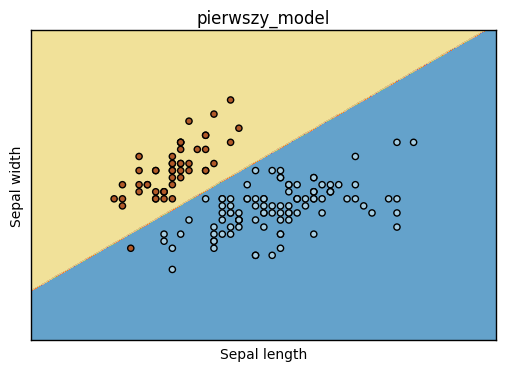

In [33]:
# Tworzymy siatkę punktów w odstępie 1e-2
h = 1e-2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Przewidujemy
Z = pierwszy_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Rysujemy ładny wykres 
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("pierwszy_model")

## Podstawy machine learningu

Podsumujmy co wiemy:
    
* Machine Learning zajmuje się tworzeniem modeli, które uczymy na podstawie danych
* Scikit-learn udostępnia wiele modeli, uczymy je za pomocą funkcji **fit**, przewidujemy za pomocą funkcji **predict**
* Ważną klasą modeli są modele liniowe na których się skupimy
* Znamy podstawy numpy i matplotlib

Wprowadzimy jeszcze 2 pojęcia:
* Testowanie modelu
* Hiperparametry



### a) Testowanie modelu

Chcemy wiedzieć jak dobry jest model który mamy. W tym celu sobie symulujemy, i dzielimy zbiór danych na ** zbiór trenujący ** i ** zbiór testujący **. Uczymy się na zbiorze trenującym, testujemy na testującym. Zwykle podsumowywujemy wynik modelu jedną liczbą, np. **dokładność** (ang. *accuracy*) czyli ilość procent poprawnie sklasyfikowanych przykładów

Przetestujmy jak sobie radzi nasz LogisticRegression na zbiorze Iris. Teraz weźmiemy wszystkie przykłady do nauki

In [7]:
# Załadujmy jeszcze raz dane iris
iris = load_iris()
X,Y = iris.data, iris.target

In [35]:
# Dzielimy (scikit-learn)
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

In [36]:
print "Pierwszy przykład trenujący: ", X_train[0], "Klasa: ", Y_train[0]

Pierwszy przykład trenujący:  [ 6.5  2.8  4.6  1.5] Klasa:  1


In [37]:
drugi_model = LinearSVC(C=1) 
drugi_model.fit(X_train, Y_train) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą
Y_test_predicted = drugi_model.predict(X_test)

In [38]:
print "Przewidywania na pierwszych 10 przykladach: ", Y_test_predicted[0:10]

Przewidywania na pierwszych 10 przykladach:  [0 1 1 0 2 2 2 0 0 2]


In [39]:
import sklearn
print "Dokładność modelu to: ",100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted), "%"

Dokładność modelu to:  89.4736842105 %


### c) Hiperparametry

Każdy model opisywany jest hiperparametrami. Przykładowo w regresji liniowej możemy podać "fit_intercept" co oznacza czy linia ma przechodzi przez środek współrzędnych czy nie. Innym parametrem jest C - intuicyjnie opisuje prostote modelu

# Cwiczenie 7 (2 pkt) 

1. Znalezc C ktore na X_test, Y_test ma 100%. 
2. Narysowac wykres, na osi X wartosc C, na osi Y dokladnosc dla danego C

In [17]:
# Sprawdzanie C=0.1
drugi_model = LinearSVC(C=0.1) 
drugi_model.fit(X_train, Y_train) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą
Y_test_predicted = drugi_model.predict(X_test)
print "Dokładność modelu to: ",100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted), "%"

Dokładność modelu to:  84.2105263158 %


C dla którego dokłasność wynosi 100 % to  4.3


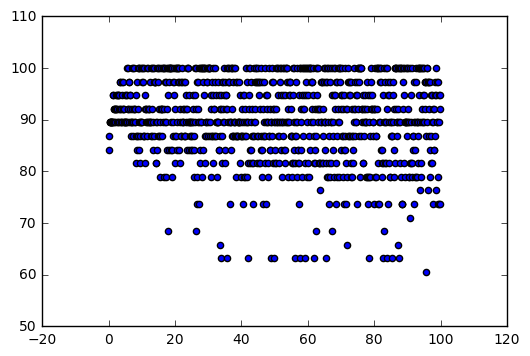

In [25]:
import numpy as np
import sklearn
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X,Y = iris.data, iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1)

for i in np.arange(0.1,100,0.1):
    C_table.append(i)
    drugi_model = LinearSVC(C=i) 
    drugi_model.fit(X_train, Y_train) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą
    Y_test_predicted = drugi_model.predict(X_test)
    accurancy=100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)
    A_table.append(accurancy)
    if(accurancy==100):
        print "C dla którego dokłasność wynosi 100 % to ", i
        break

C_table = []
A_table = []
for i in np.arange(0.1, 100, 0.1):
    C_table.append(i)
    drugi_model = LinearSVC(C=i) 
    drugi_model.fit(X_train, Y_train) # Wspominany interfejs! Po zrobieniu fit mamy linię prostą
    Y_test_predicted = drugi_model.predict(X_test)
    accurancy=100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)
    A_table.append(accurancy)
    
plt.scatter(C_table, A_table)
    
    





   

